<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment9/Assignment9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_features[0].shape)
print(num_classes)

(32, 32, 3)
10


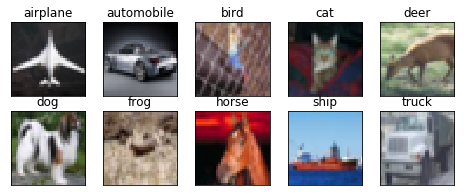

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
# RF 3
# input size 32
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 5
# input size 32
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 10
# input size 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 12
# input size 16
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# RF 14
# input size 16
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 28
# input size 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 30
# input size 8
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 32
# input size 8
model.add(Convolution2D(num_classes, 8, 8))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0625 07:39:22.920999 139730549577600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0625 07:39:22.970805 139730549577600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 07:39:22.978569 139730549577600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 07:39:23.026725 139730549577600 deprecation_wrapper.py:119] From /usr/local/lib/python3.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)       512       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=100, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
W0625 07:47:05.943872 139730549577600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 60s 153ms/step - loss: 1.8231 - acc: 0.4713 - val_loss: 1.5753 - val_acc: 0.4847

Epoch 00001: val_acc improved from -inf to 0.48469, saving model to modelBest.h5
Epoch 2/100
390/390 [==============================] - 55s 142ms/step - loss: 1.1781 - acc: 0.6383 - val_loss: 1.0843 - val_acc: 0.6484

Epoch 00002: val_acc improved from 0.48469 to 0.64844, saving model to modelBest.h5
Epoch 3/100
390/390 [==============================] - 55s 141ms/step - loss: 0.9979 - acc: 0.6965 - val_loss: 0.9427 - val_acc: 0.6687

Epoch 00003: val_acc improved from 0.64844 to 0.66875, saving model to modelBest.h5
Epoch 4/100
390/390 [==============================] - 55s 141ms/step - loss: 0.9773 - acc: 0.7161 - val_loss: 0.9442 - val_acc: 0.7079

Epoch 00004: val_acc improved from 0.66875 to 0.70791, saving model to modelBest.h5
Epoch 5/100
390/390 [==============================] - 55s 140ms/step - loss: 0.9985 - acc: 0.7175 - val_loss: 3.7813 - val_acc: 0.

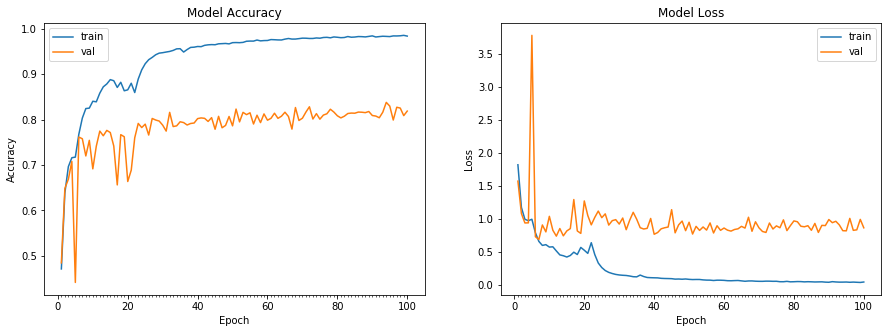

Accuracy on test data is: 81.65


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

checkpoint = ModelCheckpoint('modelBest.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            featurewise_center=True,
                            featurewise_std_normalization=True)

testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = testgen.flow(test_features, test_labels), validation_steps=100, verbose=1,
                                callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from google.colab import files
files.download('modelBest.h5') 

In [14]:
from google.colab import files
files.upload()

Saving event-featuredimg-3.png to event-featuredimg-3.png


{'event-featuredimg-3.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xc0\x00\x00\x02-\x08\x02\x00\x00\x00P"\x91\xa7\x00\x00\x00\x19tEXtSoftware\x00Adobe ImageReadyq\xc9e<\x00\x0e\xbf\xb0IDATx\xdad\xbd\x0b\x92,9\x92$\x06\x03<\xf2U\xf7\xacP\xf6\xae\xbc\x08\x8f\xc1\xab\xad\x08\x97\xb2\xec\xe9\xa9z\x19\xe10\x10\xa6\xaaf\xf0\xac\xad\x9e\xa9z\x9f\xc8\x08\x0fw\xc0`\x1f\xfd\xd8\xff\xf9\x7f\xfd\xdf\xdd\xcd\xd7\xfc\xfd\xed\xdf\x1fw\xbfW\xb3\xb6\xffY\xfb\xbfv\rk}\xffc_W\x1fW\xeb\xcdF\x1b\xd6\xdb\xd7k\xf4k\x8c\xd6.[>\xdd\x87\xb9\xd9Xk\xac\xb6l\xff\xb8\x99\xed_\xc5\x7f\xf1\xefx\xc7n\xe6\xfbM\x97~\xbd?\xc1\xe3\xef\xf6\xaf[\xbcb\xffy\xc7\x8f-\xfe&~\xb1/b\x7f6~\x81k\x8a\x9fZ\x16o\x14o\x1a\x1f\x86\xd7\xae\xfdN\xf1V\x1d\x9f\x13\x17\x19?\x80?\x1c}_\xd4\x9a\x8b?\x1ao}\xf5\xee\xf1\xe3\xf8\x93\xd6\xf5e\xe3\xaa\xf7\x8f\xfb~\x87\xfd\'\xbe\xf0%\xf0!m\xb9\xf5\xb1\xff>~\xbf\xdf\x0bW\xd9|\x7f\xdd\xf8\xec\xfdNc\x8c\xfd\xfa\xfd\xab\xf8\x93\xde[\xfc,?/\xbe\xf7\xfe\x8b\xf8.\xce\xcb\x8fw\xdc/\xee\xba+\xbc=\xf

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
img_path = "event-featuredimg-3.png"
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_8")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [24]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


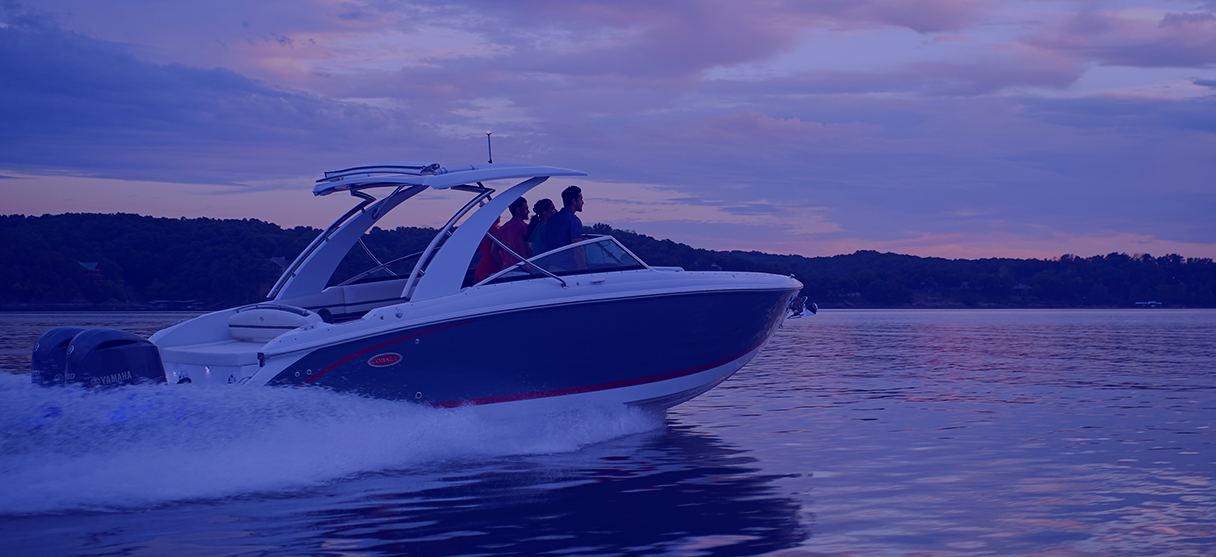

-1

In [28]:
from google.colab.patches import cv2_imshow
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
#cv2_imshow(img)
cv2_imshow(superimposed_img)
cv2.waitKey(0)